In [1]:
#import satellite flythrough code
#%matplotlib widget  #make matplotlib plots interactive
from kamodo.satelliteflythrough import SatelliteFlythrough as S

In [2]:
#get full syntax to create a sample trajectory
help(S.SampleTrajectory)

Help on function SampleTrajectory in module kamodo.satelliteflythrough.SatelliteFlythrough:

SampleTrajectory(start_time, stop_time, plot_dir='', max_lat=65.0, min_lat=-65.0, lon_perorbit=363.0, max_height=450.0, min_height=400.0, p=0.01, n=2.0, plots=False, plot_close=True, plot_sampling=5000)
    Given start and stop times in timestamp form, return a test satellite trajectory.
    Parameters:
        start_time = timestamp in seconds since 1970-01-01 when trajectory begins.
        stop_time = timestamp in seconds since 1970-01-01 when trajectory ends.
        plot_dir = location and where trajectory plot will be saved, including
            final '/' (default='' to not save a plot).
        max_lat = the highest latitude desired in degrees (default=65.).
        min_lat = the lowest latitude desired in degrees  (default=-65.).
        lon_perorbit = the number of longitude degrees covered in 90 min. (default=363. to precess)
        max_height = the highest altitude above the surfac

To understand the sample trajectory variables, compare the two plots generated for 10 orbits with parameters:
max_lat = 65., min_lat=-65., lon_perorbit=363., max_height=450000., min_height=420000., p=0.01, and n=2.
(The time values are the colors on the 3D heat plot.)

'./Kamodo_WinDev1/Plots/SampleTrajectory_10orbitsTime10_1Dlines.png'
'./Kamodo_WinDev1/Plots/SampleTrajectory_10orbitsTime10_3Dheat.png'

C:\Users\rringuet\.conda\envs\Kamodo_WinDev1\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:946: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\rringuet\.conda\envs\Kamodo_WinDev1\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:948: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


Attribute/Key names of return dictionary: dict_keys(['sat_time', 'sat_lon', 'sat_height', 'sat_lat'])
Units are given in the function description. Type: help(SampleTrajectory)


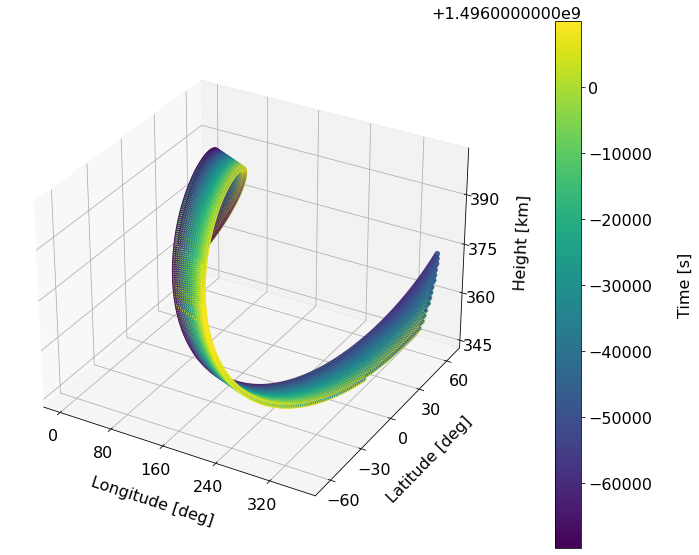

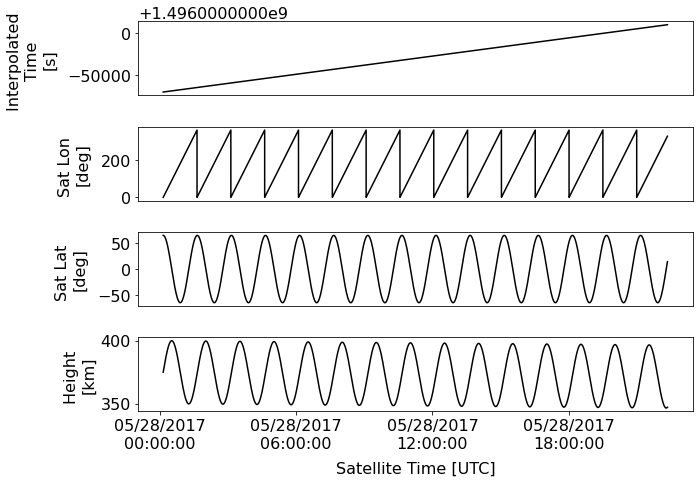

In [3]:
#generate a sample trajectory
sat_dict = S.SampleTrajectory(1495930160.0, 1496010000.0, plot_dir='C:/Users/rringuet/Kamodo_WinDev1/SatelliteFlythrough/', 
        max_height=400., min_height=350., plot_close=False)

In [4]:
#What models are possible?
S.ModelVariables()

Possible models are: 'CTIPe','IRI', 'GITM', and 'SWMF_IE'


In [5]:
#What are the variable names available from that model?
S.ModelVariables('IRI')


The functions accept the standardized variable names listed below.
Units for the chosen variables are printed during the satellite flythrough if available.
Possible variables for IRI model (description = standard variable name):
-----------------------------------------------------------------------------------
Ne : '['N_e', 'electron_density', '1/m**3']'
Te : '['T_e', 'electron_temperature', 'K']'
Ti : '['T_i', 'ion_temperature', 'K']'
Tn : '['T_n', 'neutral_temperature', 'K']'
O+ : '['N_Oplus', 'atomic_oxygen_ion_density', '1/m**3']'
H+ : '['N_Hplus', 'atomic_hydrogen_ion_density', '1/m**3']'
He+ : '['N_Heplus', 'atomic_helium_ion_density', '1/m**3']'
O2+ : '['N_O2plus', 'molecular_oxygen_ion_density', '1/m**3']'
NO+ : '['N_NOplus', 'nitric_oxide_ion_density', '1/m**3']'
N+ : '['N_Nplus', 'atomic_nitrogen_ion_density', '1/m**3']'
TEC : '['TEC', 'total_electron_content', '10**16/m**2']'
NmF2 : '['NmF2', 'max_electron_density', '1/m**3']'
HmF2 : '['HmF2', 'max_electron_density_height'

In [6]:
#get descriptions of the call parameters for the model flythrough
help(S.ModelFlythrough)

Help on function ModelFlythrough in module kamodo.satelliteflythrough.SatelliteFlythrough:

ModelFlythrough(model, file_dir, variable_list, sat_time, sat_height, sat_lat, sat_lon, dt=450.0, plots=False, daily_plots=False, plot_close=True, plot_sampling=5000, verbose=False)
    Call satellite flythrough wrapper specific to the model chosen.
    Parameters:    
        Name of model: model (Options: 'CTIPe', ...)
        Absolute path to where model data is stored: file_dir
        List of desired standardized variable names: variable_list
        Array of satellite trajectory timestamps: sat_time
            (in number of seconds since 1970-01-01)
        Array of satellite trajectory heights in meters: sat_height
        Array of satellite trajectory latitudes in degrees: sat_lat
        Array of satellite trajectory longitudes in degrees: sat_lon    
        Option to make plots of whole flythrough: plots (default=False)
        Option to make plots of daily sections: daily_plots (def

C:/Users/rringuet/Kamodo_WinDev1/IRI/Data/IRI.3D.*.nc
C:/Users/rringuet/Kamodo_WinDev1/IRI/Data\IRI.3D.2017148.nc

Adjusted 0 times within 7.5 minutes of a file to be in the nearest file.
C:/Users/rringuet/Kamodo_WinDev1/IRI/Data\IRI.3D.2017148.nc C:/Users/rringuet/Kamodo_WinDev1/IRI/Data\IRI.2D.2017148.nc


C:\Users\rringuet\.conda\envs\Kamodo_WinDev1\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:946: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\rringuet\.conda\envs\Kamodo_WinDev1\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:948: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


Results_units: 
{'TEC': '10**16/m**2',
 'T_e': 'K',
 'net_idx': '',
 'sat_height': 'km',
 'sat_lat': 'deg',
 'sat_lon': 'deg',
 'sat_time': 's'}


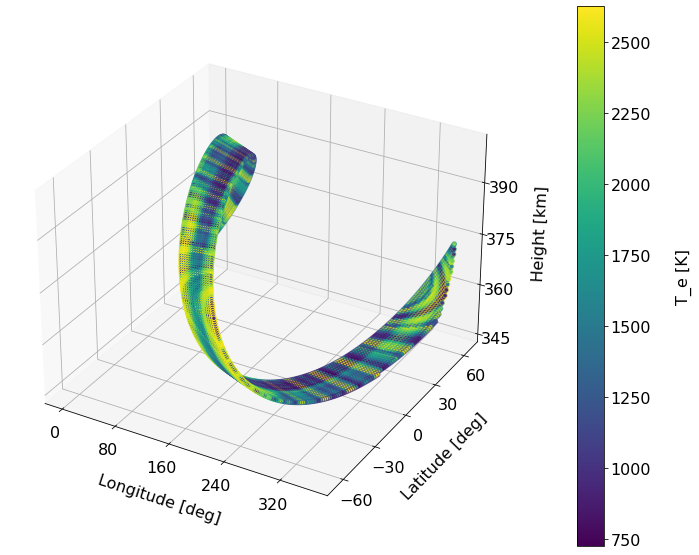

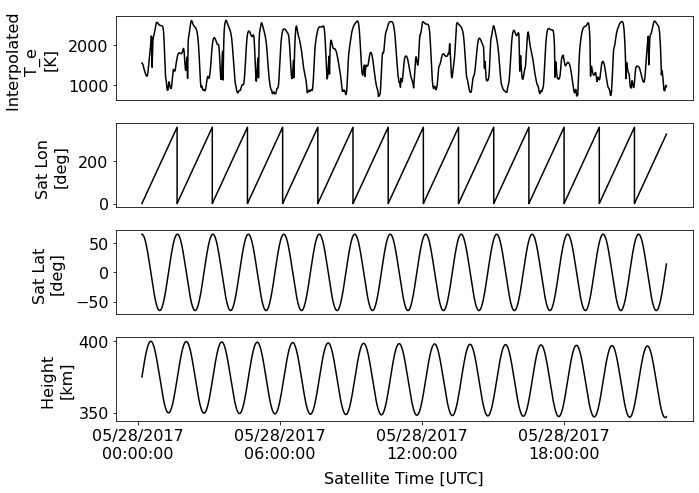

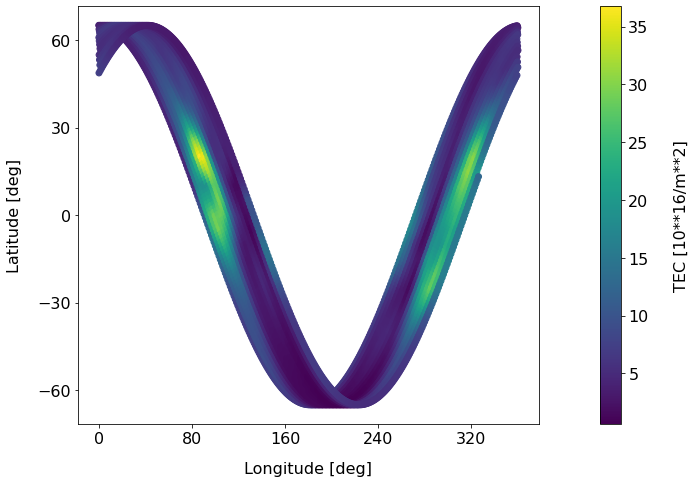

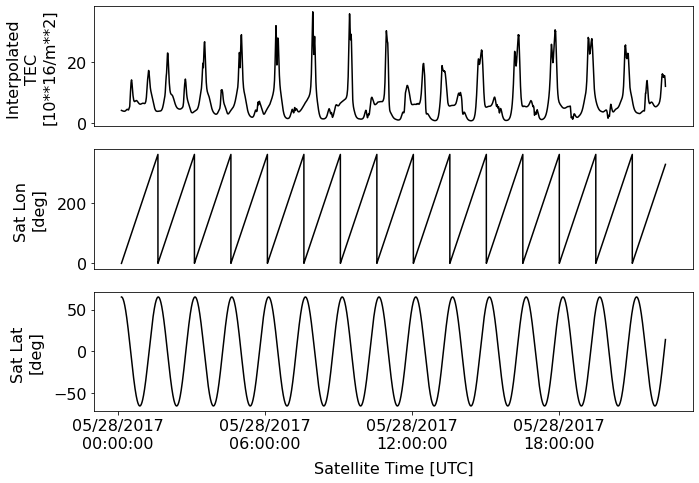

In [7]:
#run satellite flythrough code for parameters that don't require ilev (Pressure level)
results = S.ModelFlythrough('IRI', 'C:/Users/rringuet/Kamodo_WinDev1/IRI/', ['T_e','TEC'], 
                sat_dict['sat_time'], sat_dict['sat_height'], sat_dict['sat_lat'], sat_dict['sat_lon'], 
                plots=True, plot_close=False)

In [8]:
#how to create sample trajectory and run flythrough code in one command
help(S.FakeFlight)

Help on function FakeFlight in module kamodo.satelliteflythrough.SatelliteFlythrough:

FakeFlight(start_time, stop_time, model, file_dir, variable_list, max_lat=65.0, min_lat=-65.0, lon_perorbit=363.0, max_height=450.0, min_height=400.0, p=0.01, n=2.0, dt=450.0, plots=True, daily_plots=False, plot_close=True, plot_sampling=5000, trajplot_close=True, verbose=False)
    Master function that executes all functions of flythrough for sample trajectory. 
    Parameters:    
        Timestamp for start of trajectory (number of seconds since 1970-01-01): start
        Timestamp for stop of trajectory (number of seconds since 1970-01-01): stop
        Name of model: model (Options: 'CTIPe', ...)
        Location where model data is stored: file_dir
        List of standardized variable names: variable_list
        The highest desired latitude in degrees: max_lat (default=65.)
        The highest desired longitude in degrees: min_lat (default=-65.)
        The number of longitude degrees covered

C:\Users\rringuet\.conda\envs\Kamodo_WinDev1\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:946: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\rringuet\.conda\envs\Kamodo_WinDev1\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:948: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


Attribute/Key names of return dictionary: dict_keys(['sat_time', 'sat_lon', 'sat_height', 'sat_lat'])
Units are given in the function description. Type: help(SampleTrajectory)
C:/Users/rringuet/Kamodo_WinDev1/IRI/Data/IRI.3D.*.nc
C:/Users/rringuet/Kamodo_WinDev1/IRI/Data\IRI.3D.2017148.nc

Adjusted 0 times within 7.5 minutes of a file to be in the nearest file.
C:/Users/rringuet/Kamodo_WinDev1/IRI/Data\IRI.3D.2017148.nc C:/Users/rringuet/Kamodo_WinDev1/IRI/Data\IRI.2D.2017148.nc


C:\Users\rringuet\.conda\envs\Kamodo_WinDev1\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:946: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\rringuet\.conda\envs\Kamodo_WinDev1\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:948: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


Results_units: 
{'TEC': '10**16/m**2',
 'T_e': 'K',
 'net_idx': '',
 'sat_height': 'km',
 'sat_lat': 'deg',
 'sat_lon': 'deg',
 'sat_time': 's'}


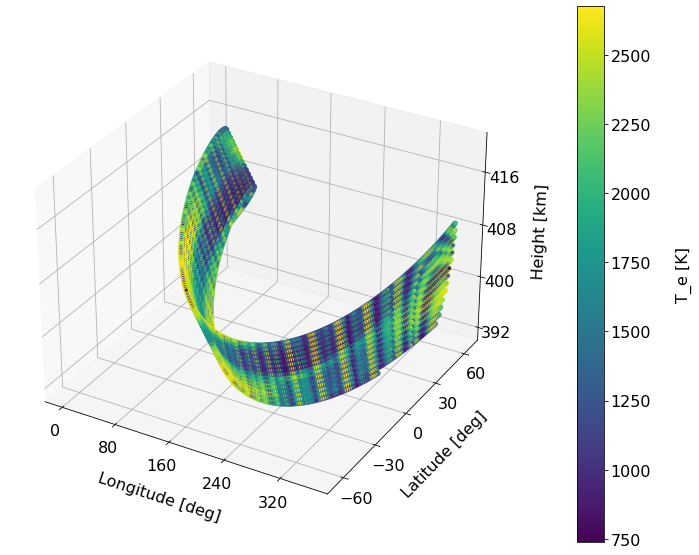

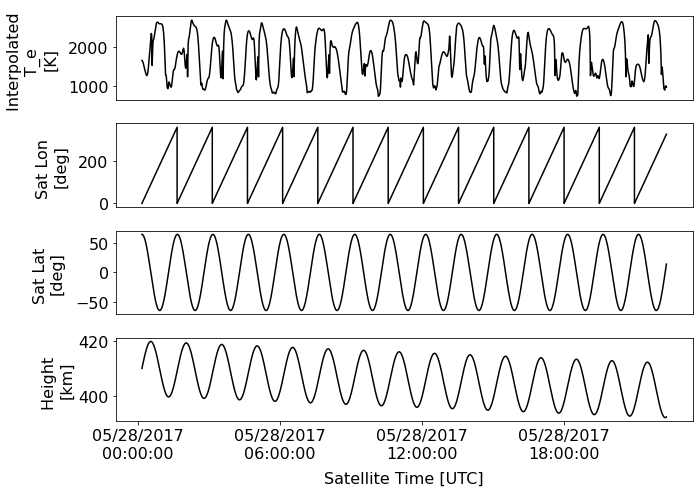

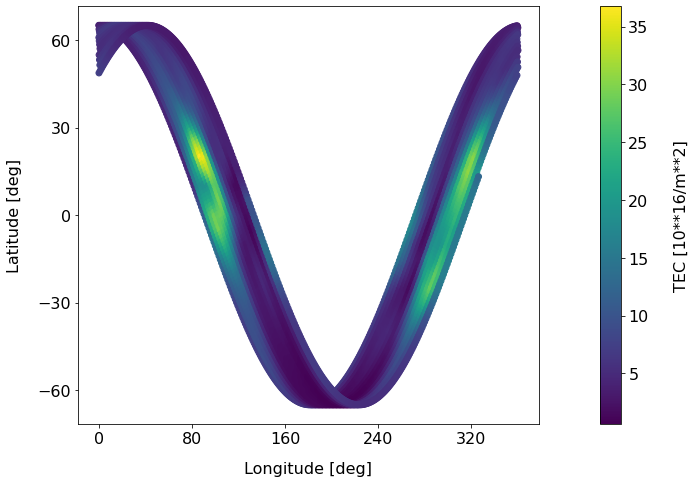

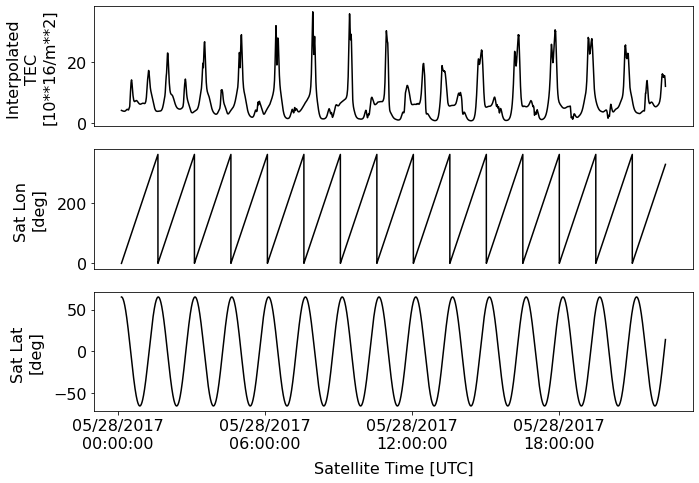

In [9]:
#run FakeFlight (easy syntax)
results = S.FakeFlight(1495930160.0, 1496010000.0, 'IRI', 'C:/Users/rringuet/Kamodo_WinDev1/IRI/', 
                     ['T_e','TEC'], max_height=420., p=0.02, 
                     plot_close=False)

In [10]:
results

{'sat_time': array([1.49593016e+09, 1.49593016e+09, 1.49593016e+09, ...,
        1.49601000e+09, 1.49601000e+09, 1.49601000e+09]),
 'sat_height': array([410.        , 410.02307925, 410.04615838, ..., 392.2326017 ,
        392.23741532, 392.24228185]),
 'sat_lat': array([65.        , 64.99982387, 64.99929547, ..., 13.92593798,
        14.07370441, 14.22139457]),
 'sat_lon': array([0.00000000e+00, 1.34447812e-01, 2.68895625e-01, ...,
        3.26753327e+02, 3.26887774e+02, 3.27022222e+02]),
 'net_idx': array([    0,     1,     2, ..., 39917, 39918, 39919]),
 'T_e': array([1651.3810262 , 1651.2847468 , 1651.17209435, ...,  972.43724576,
         971.77204553,  971.10176154]),
 'TEC': array([ 4.0687927 ,  4.06622619,  4.0636745 , ..., 12.20344265,
        12.12424872, 12.04622854])}

In [11]:
print((results['sat_time'].max()-results['sat_time'].min())/60., 'minutes')

1330.6666666666667 minutes


In [12]:
from kamodo.satelliteflythrough.wrapper_output import SFdata_tocdf

model_filenames = 'C:/Users/rringuet/Kamodo_WinDev1/IRI\IRI.3D.2017148.nc,C:/Users/rringuet/Kamodo_WinDev1/IRI\IRI.2D.2017148.nc'
results_units = {'T_e': 'K', 'TEC': '10**16/m**2', 'sat_height': 'km', 'net_idx': '', 'sat_lat': 'deg', 'sat_lon': 'deg', 'sat_time': 's'}
cdf_filename = SFdata_tocdf('C:/Users/rringuet/Kamodo_WinDev1/IRI/IRI_Ola_Abuelezz_011121_IT_12_sample',
                            model_filenames, 'IRI', results, results_units)

In [13]:
from netCDF4 import Dataset
d = Dataset(cdf_filename)
for key in d.variables.keys(): print(key, d.variables[key].shape, 
                                     d.variables[key].__array__().min(), d.variables[key].__array__().max())
d.close()

sat_time (39920,) 1495930100.0 1496010000.0
sat_height (39920,) 392.01862 419.86514
sat_lat (39920,) -64.999954 65.0
sat_lon (39920,) 0.0 359.9939
net_idx (39920,) 0.0 39919.0
T_e (39920,) 737.28955 2675.661
TEC (39920,) 0.630403 36.746468


C:\Users\rringuet\.conda\envs\Kamodo_WinDev1\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:946: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\rringuet\.conda\envs\Kamodo_WinDev1\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:948: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


Attribute/Key names of return dictionary: dict_keys(['sat_time', 'sat_height', 'sat_lat', 'sat_lon'])
Units of variables are: {'sat_time': 's', 'sat_height': 'km', 'sat_lat': 'deg', 'sat_lon': 'deg'}
C:/Users/rringuet/Kamodo_WinDev1/IRI/Data/IRI.3D.*.nc
C:/Users/rringuet/Kamodo_WinDev1/IRI/Data\IRI.3D.2017148.nc

Adjusted 7 times within 7.5 minutes of a file to be in the nearest file.
7 data points are farther than 7.5 minutes from model times and are excluded.

Check that data fits in file time ranges:
Data time range (UTC): 1495929600.0 1496015940.0
Filename, Min DateTime, Max DateTime, Min Time (UTC), Max Time (UTC)
IRI.3D.2017148.nc [1495929600.0, 1496015100.0]
C:/Users/rringuet/Kamodo_WinDev1/IRI/Data\IRI.3D.2017148.nc C:/Users/rringuet/Kamodo_WinDev1/IRI/Data\IRI.2D.2017148.nc


C:\Users\rringuet\.conda\envs\Kamodo_WinDev1\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:946: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\rringuet\.conda\envs\Kamodo_WinDev1\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:948: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


Results_units: 
{'T_e': 'K',
 'net_idx': '',
 'sat_height': 'km',
 'sat_lat': 'deg',
 'sat_lon': 'deg',
 'sat_time': 's'}
Attribute/Key names of return dictionary:
dict_keys(['sat_time', 'sat_height', 'sat_lat', 'sat_lon', 'net_idx', 'T_e'])


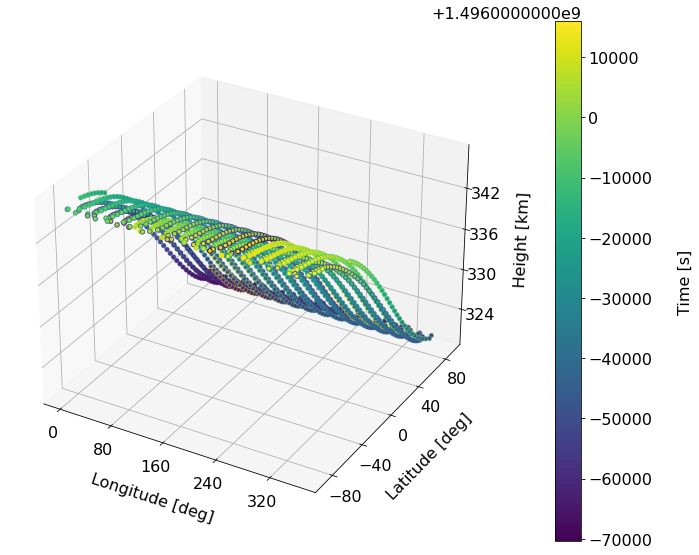

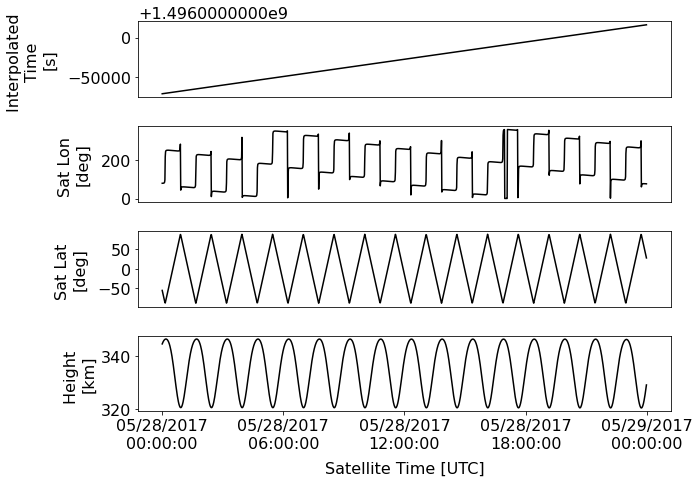

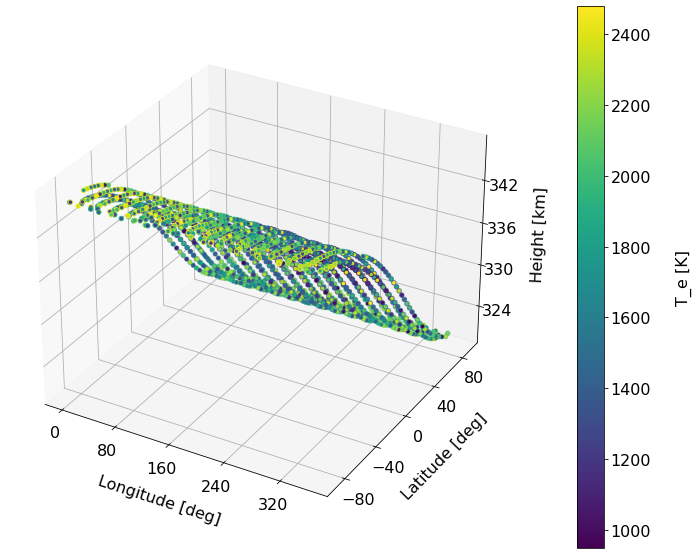

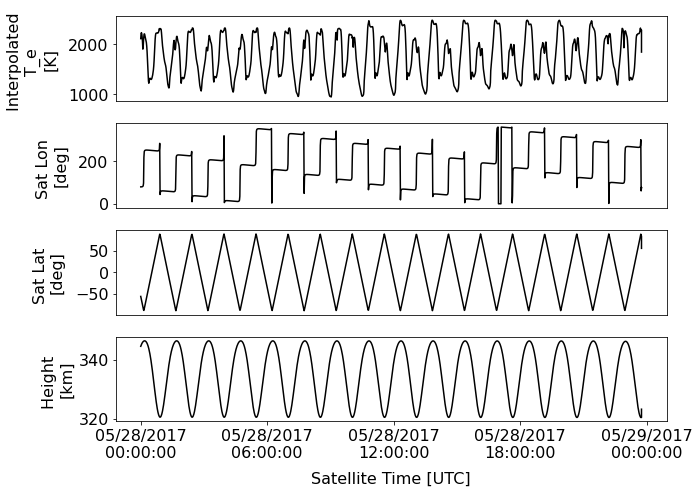

In [14]:
server = 'http://hapi-server.org/servers/SSCWeb/hapi'
dataset = 'grace1'
parameters = 'X_GEO,Y_GEO,Z_GEO'
start, stop, model, file_dir, variable_list = '2017-05-28T00:00:00','2017-05-29T00:00:00',\
    'IRI', 'C:/Users/rringuet/Kamodo_WinDev1/IRI/', ['T_e']  #good

sat_dict = S.RealFlight(server, dataset, parameters, start, stop, model, file_dir, 
                 variable_list, time_offset=0., dt=450., plots=True, daily_plots=False, 
                 plot_close=False, plot_sampling=5000, verbose=False)

C:\Users\rringuet\.conda\envs\Kamodo_WinDev1\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:946: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\rringuet\.conda\envs\Kamodo_WinDev1\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:948: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


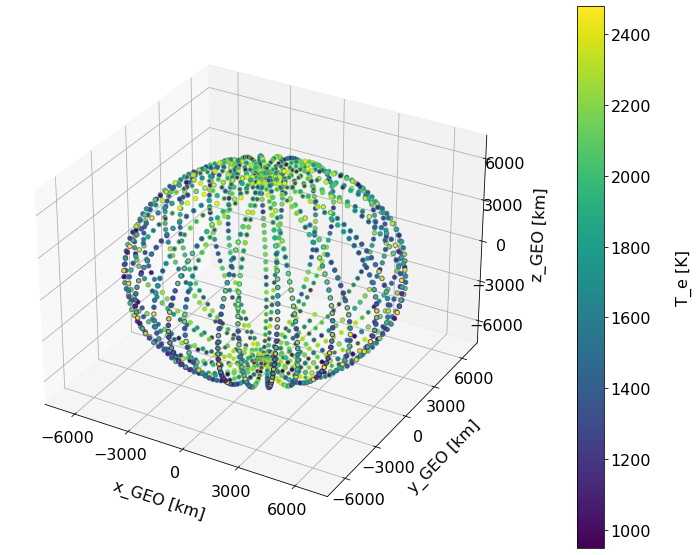

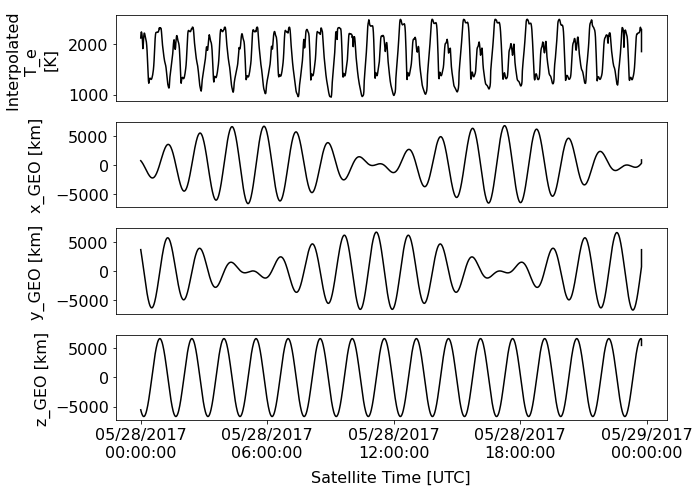

In [15]:
from kamodo.satelliteflythrough import FlythroughPlots as FPlot
FPlot.Plot4Dcar('T_e',sat_dict['sat_time'][sat_dict['net_idx']],
                sat_dict['sat_lat'][sat_dict['net_idx']],sat_dict['sat_lon'][sat_dict['net_idx']],
                sat_dict['sat_height'][sat_dict['net_idx']], sat_dict['T_e'], 'K', 
                'C:/Users/rringuet/Kamodo_WinDev1/iri/Plots/', plot_close=False, 
                plot_sampling=10000) 